# CIFAR-10 Training

### Colab setup option 1, works if files are in "My Drive", skip if running locally.

In [ ]:
# Google mount, skip if running locally.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Google colab setup, skip if running locally.
import sys
from os.path import dirname

# Path to google drive
basepath='/content/drive/My Drive/train-using-sion'
output=basepath + '/data/output.csv'
sys.path.append(basepath)

### Colab setup option 2, update from GitHub, skip if running locally

In [2]:
# Clone the entire repo. Skip if cloned.
!git clone -l -s https://github.com/zhangjyr/train-using-sion.git train-using-sion
%cd train-using-sion

Cloning into 'train-using-sion'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 38 (delta 10), reused 33 (delta 8), pack-reused 0
Unpacking objects: 100% (38/38), done.
/content/train-using-sion
/content/train-using-sion


In [11]:
import sys
%cd train-using-sion
!git pull
basepath='/content/train-using-sion'
sys.path.append(basepath)
%mkdir -p '/content/data'
output='/content/data/output.csv'

/content/train-using-sion
Already up to date.


### S3 setup, may required by colab running

In [ ]:
!pip install boto3

### Basic training using cpu

In [2]:
import logging_utils
from pytorch_training import train

LOGGER = logging_utils.initialize_logger(True)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
model, testset = train(config={"test_mode": False, "epochs": 10, "cpu": False, "output": output})

Config: {'test_mode': False, 'epochs': 10, 'cpu': False, 'output': '/content/data/output.csv', 'dataset': 'cifar', 'ready': False, 'disk_source': '', 's3_source': '', 's3_train': '', 's3_test': '', 'loader': '', 'model': '', 'batch': 64, 'minibatch': 16, 'accuracy': 1.0, 'benchmark': False, 'workers': 0, 'prefix': ''}


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Initializing BasicCNN model
Running training with the 
Epoch: 001/001 | Batch: 100/157 | Cost: 0.0000 | Elapsed: 3.914 secs
2022-06-22 00:03:09,137 — default — INFO — Pretrained top-1 accuracy: 8.550, top-5 accuracy 41.530
Epoch: 001/001 | Batch: 100/782 | Cost: 2.1543 | Elapsed: 6.196 secs
Epoch: 001/001 | Batch: 200/782 | Cost: 1.9625 | Elapsed: 12.422 secs
Epoch: 001/001 | Batch: 300/782 | Cost: 1.8613 | Elapsed: 18.565 secs
Epoch: 001/001 | Batch: 400/782 | Cost: 1.8049 | Elapsed: 24.775 secs
Epoch: 001/001 | Batch: 500/782 | Cost: 1.7715 | Elapsed: 30.910 secs
Epoch: 001/001 | Batch: 600/782 | Cost: 1.6877 | Elapsed: 37.051 secs
Epoch: 001/001 | Batch: 700/782 | Cost: 1.6750 | Elapsed: 43.313 secs
2022-06-22 00:03:57,597 — default — INFO — [Epoch   1] Training for Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), p

Show training result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


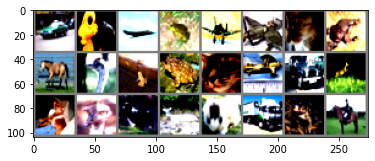

Labels:  tensor([1, 2, 0, 6, 0, 0, 3, 6, 7, 2, 6, 6, 3, 0, 9, 4, 5, 2, 5, 4, 5, 9, 6, 7])
Labels:  car   bird  plane frog  plane plane cat   frog  horse bird  frog  frog  cat   plane truck deer  dog   bird  dog   deer  dog   truck frog  horse

Predictions:  tensor([1, 5, 0, 6, 0, 6, 6, 6, 4, 5, 6, 6, 3, 1, 9, 4, 5, 3, 2, 4, 5, 9, 6, 7])
Predictions:  car   dog   plane frog  plane frog  frog  frog  deer  dog   frog  frog  cat   car   truck deer  dog   cat   bird  deer  dog   truck frog  horse

Predicted 16/24 correctly. Accuracy: 67%.


In [4]:
from torch.utils.data import DataLoader
from utils import predict_and_display

num_record = 24
test_dataloader = DataLoader(testset, batch_size=num_record, shuffle=True)
images, labels = next(iter(test_dataloader))

predict_and_display(model, images, labels)

Preview output

In [8]:
!head '/content/data/output.csv'

type,epoch,start,loading,duration,value1,value2
1,0,1655856183.052500,2.843767,6.084602,0.085500,0.415300
2,1,1655856189.140542,2.988078,6.195529,100.000000,782.000000
2,1,1655856195.336448,2.996785,6.226229,200.000000,782.000000
2,1,1655856201.563016,2.978347,6.142835,300.000000,782.000000
2,1,1655856207.706771,3.018944,6.209025,400.000000,782.000000
2,1,1655856213.916145,2.957753,6.133866,500.000000,782.000000
2,1,1655856220.051298,2.971969,6.140094,600.000000,782.000000
2,1,1655856226.191742,3.025527,6.261794,700.000000,782.000000
0,1,1655856189.140531,23.402532,48.457282,0.338600,0.764740


Download output

In [9]:
from google.colab import files

files.download(output)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>